# Finite strains

A quick notebook to try to reduce the problem to looking at some simple pictures. There seems to be a lot more than one way to define the strain tensor components. We use a 2D example for now so it is easier to draw pictures. This is a part two which attempts to get to the point of choosing between some options of different strain tensors.

In [1]:
%matplotlib inline  
import matplotlib.pyplot as pl, numpy as np

## Reference State

Use the case of an in-situ loading experiment where the initial state is known. 
This is also like the case of mapping around a crack tip in a deforming single crystal.
It will not work for residual strain where there is no reference orientation.
We will assume the crystal is cubic (square) and was carefully aligned on the diffractometer
so the axes are parallel to the axes. The unit cell and lattice vectors in real space are:

In [2]:
def unstrained_lattice(a0, f):
    a = ( a0,  0,  0 )
    b = (  0, a0,  0 )
    c = ( 0,  0, a0 )
    return a, b, c

## Pure shear strain
We apply a pure shear strain as drawn in some pictures found on the internet. 
The atoms which were on the laboratory axes move at exactly 90 degrees to the axes and not
along the axes. We have "f" as symbol for the fractional finite movement. 
It is not clear whether this "f" corresponds to a shear strain $\epsilon_{12}$

In [3]:
def pure_shear_lattice(a0, f):
    a = (  a0, f*a0,  0)  # vector in x/y/z laboratory space
    b = (f*a0,   a0,  0)
    c = (   0,    0, a0)
    return (a, b, c)

## Simple shear strain
This case does not seem simple at all. Nevertheless, 
there are pictures on the internet showing this definition.
The loss of symmetry is appalling. We will re-use the same f as before but we are choosing to keep the x-axis parallel to the a axis. A different choice would place it along b.

In [4]:
def simple_shear_lattice(a0, f):
    a = (     a0,      0,  0)
    b = ( 2*f*a0,     a0,  0)
    c = (      0,      0, a0)
    return (a, b, c)

## Experimental shear strain
We imagine a careful experimentalist who realigns their strained crystal on the diffractometer after is has undergone a **pure** strain. Their crystal is beautiful and symmetric but because the realign it this is no longer to easy to see. The lattice vectors are now harder to compute:

In [5]:
def experimental_shear_lattice(a0, f):
    a1 = a0 * np.sqrt(1+f*f)   # length of a and b after straining
    phi = 2 * np.arctan(f)  # Rotation angle to realign crystal
    a = ( a1, 0, 0 )
    b = ( a1*np.sin(phi), a1*np.cos(phi), 0 )
    c = ( 0, 0, a0 )
    return (a, b, c)

## A new Strain Tensor?

There is another notebook about this. We ended up finding the deformation gradient tensor and then giving all of the Seth-Hill family as options for ImageD11.finite_strain. Here is a fast run through:

The lattice in real space row vectors is **ubi** in ImageD11. The deformation gradient tensor transforms column vectors. Also $\mathbf{(UBI) = (UB)^{-1}}$. Therefore:

$ \mathbf{ (UBI)^T = F.(UBI_0)^T } $

$ \mathbf{ F = (UBI)^T . (UB_0)^T } $

Once you have $\mathbf{F}$ then the rest plugs into finite strain theory. This can be decomposed into a "left" or a "right" pair of matrices that correspond to rotation followed by stretch or stretch followed by rotation:

$ \mathbf{ F = V.R = R.S } $

The $\mathbf{R}$ matrix is rhe same as the conventional $\mathbf{U}$ above. Note that the finite strain literature uses the $\mathbf{U}$ for the stretch that we have as $\mathbf{S}$. There are now a family of strain tensors given by m=0,0.5,1,...:

$ \mathbf{ e_m = \frac{1}{2m} ( V^{2m} - I )  = \frac{1}{2m} ( (F.F^{T})^{m} - I ) } $

$ \mathbf{ E_m = \frac{1}{2m} ( S^{2m} - I )  = \frac{1}{2m} ( (F^{T}.F)^{m} - I ) } $

$ \mathbf{ E_0 } = \log(\mathbf{ S })  = \frac{1}{2} \log( \mathbf{F^{T}.F} ) $

Numerically some of these are less pretty because of the difference between:

$ \epsilon = \frac{d - d0}{d0} \neq \frac{d - d0}{d} $

In what follows: note that **ubi**$ = \mathbf{(UB)^{-1} = B^{-1}U^{-1} }$ so that whenever we use this matrix we want to try ensure the transpose is done to keep the $U$ out of the results. Many hours have been spent with transposes the wrong way around, etc.

In [6]:
# In the implementation we have:
from ImageD11.grain import grain
print(" grain.eps_grain_matrix:")
print( grain.eps_grain_matrix.__doc__)
print(" grain.eps_sample_matrix:")
print( grain.eps_sample_matrix.__doc__)

 grain.eps_grain_matrix:
 dzero_cell can be another grain or cell parameters
                [a,b,c,alpha,beta,gamma]
            m is the exponent for the Seth-Hill finite strain tensors
            E = 1/2m (U^2m - I)
            (Negative m reverses the reference and lab systems).
        Returns eps as a symmetric matrix
        ... in the grain reference system of dzero_cell
        
 grain.eps_sample_matrix:
 dzero_cell can be another grain or cell parameters:
                [a,b,c,alpha,beta,gamma]
            m is the exponent for the Seth-Hill finite strain tensors
            E = 1/2m (V^2m - I)
            (Negative m reverses the reference and lab systems).
        Returns eps as a symmetric matrix
        ... in the sample system (z up, x along the beam at omega=0)
        


## What do these look like?
We will plot the three lattices on three plots for some different values of f.

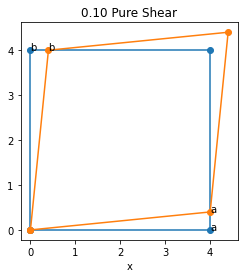

Pure Shear unit cell [ 4.019950  4.019950  4.000000 90.000000 90.000000 78.578814]
dzero unit cell [ 4.000000  4.000000  4.000000 90.000000 90.000000 90.000000]
UBI:
[[4.000000 0.400000 0.000000]
 [0.400000 4.000000 0.000000]
 [0.000000 0.000000 4.000000]]
UBI0:
[[4.000000 0.000000 0.000000]
 [0.000000 4.000000 0.000000]
 [0.000000 0.000000 4.000000]]
Grain co-ordinates micro eps, m= 0
[[-2512.6 50167.7     0.0]
 [50167.7 -2512.6     0.0]
 [    0.0     0.0     0.0]]
Sample co-ordinates micro eps, m= 0
[[-2512.6 50167.7     0.0]
 [50167.7 -2512.6     0.0]
 [    0.0     0.0     0.0]]
Grain co-ordinates micro eps, m= 0.5
[[    -0.0 100000.0      0.0]
 [100000.0     -0.0      0.0]
 [     0.0      0.0      0.0]]
Sample co-ordinates micro eps, m= 0.5
[[     0.0 100000.0      0.0]
 [100000.0     -0.0      0.0]
 [     0.0      0.0      0.0]]
Grain co-ordinates micro eps, m= 1
[[  5000.0 100000.0      0.0]
 [100000.0   5000.0      0.0]
 [     0.0      0.0      0.0]]
Sample co-ordinates micro ep

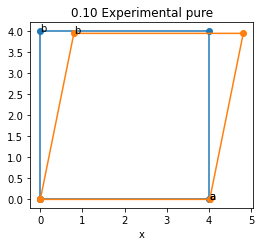

Experimental pure unit cell [ 4.019950  4.019950  4.000000 90.000000 90.000000 78.578814]
dzero unit cell [ 4.000000  4.000000  4.000000 90.000000 90.000000 90.000000]
UBI:
[[4.019950 0.000000 0.000000]
 [0.796030 3.940347 0.000000]
 [0.000000 0.000000 4.000000]]
UBI0:
[[4.000000 0.000000 0.000000]
 [0.000000 4.000000 0.000000]
 [0.000000 0.000000 4.000000]]
Grain co-ordinates micro eps, m= 0
[[-2512.6 50167.7     0.0]
 [50167.7 -2512.6     0.0]
 [    0.0     0.0     0.0]]
Sample co-ordinates micro eps, m= 0
[[  7421.6  49174.3      0.0]
 [ 49174.3 -12446.8      0.0]
 [     0.0      0.0      0.0]]
Grain co-ordinates micro eps, m= 0.5
[[     0.0 100000.0      0.0]
 [100000.0     -0.0      0.0]
 [     0.0      0.0      0.0]]
Sample co-ordinates micro eps, m= 0.5
[[ 19802.0  98019.8      0.0]
 [ 98019.8 -19802.0      0.0]
 [     0.0      0.0      0.0]]
Grain co-ordinates micro eps, m= 1
[[  5000.0 100000.0      0.0]
 [100000.0   5000.0      0.0]
 [     0.0      0.0      0.0]]
Sample co-or

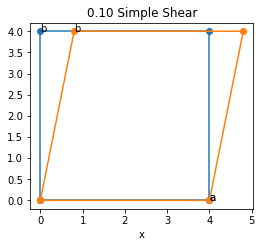

Simple Shear unit cell [ 4.000000  4.079216  4.000000 90.000000 90.000000 78.690068]
dzero unit cell [ 4.000000  4.000000  4.000000 90.000000 90.000000 90.000000]
UBI:
[[4.000000 0.000000 0.000000]
 [0.800000 4.000000 0.000000]
 [0.000000 0.000000 4.000000]]
UBI0:
[[4.000000 0.000000 0.000000]
 [0.000000 4.000000 0.000000]
 [0.000000 0.000000 4.000000]]
Grain co-ordinates micro eps, m= 0
[[-4966.9 49669.3     0.0]
 [49669.3  4966.9     0.0]
 [    0.0     0.0     0.0]]
Sample co-ordinates micro eps, m= 0
[[ 4966.9 49669.3     0.0]
 [49669.3 -4966.9     0.0]
 [    0.0     0.0     0.0]]
Grain co-ordinates micro eps, m= 0.5
[[-4962.8 99503.7     0.0]
 [99503.7 14937.9     0.0]
 [    0.0     0.0     0.0]]
Sample co-ordinates micro eps, m= 0.5
[[14937.9 99503.7     0.0]
 [99503.7 -4962.8     0.0]
 [    0.0     0.0     0.0]]
Grain co-ordinates micro eps, m= 1
[[     0.0 100000.0      0.0]
 [100000.0  20000.0      0.0]
 [     0.0      0.0      0.0]]
Sample co-ordinates micro eps, m= 1
[[ 20000

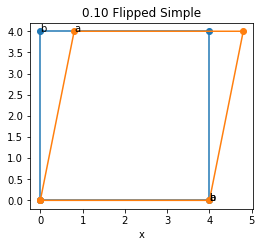

Flipped Simple unit cell [ 4.079216  4.000000  4.000000 90.000000 90.000000 78.690068]
dzero unit cell [ 4.000000  4.000000  4.000000 90.000000 90.000000 90.000000]
UBI:
[[ 0.800000  4.000000  0.000000]
 [ 4.000000  0.000000  0.000000]
 [-0.000000 -0.000000 -4.000000]]
UBI0:
[[4.000000 0.000000 0.000000]
 [0.000000 4.000000 0.000000]
 [0.000000 0.000000 4.000000]]
Grain co-ordinates micro eps, m= 0
[[ 4966.9 49669.3     0.0]
 [49669.3 -4966.9     0.0]
 [    0.0     0.0     0.0]]
Sample co-ordinates micro eps, m= 0
[[ 4966.9 49669.3     0.0]
 [49669.3 -4966.9     0.0]
 [    0.0     0.0     0.0]]
Grain co-ordinates micro eps, m= 0.5
[[14937.9 99503.7     0.0]
 [99503.7 -4962.8     0.0]
 [    0.0     0.0     0.0]]
Sample co-ordinates micro eps, m= 0.5
[[14937.9 99503.7     0.0]
 [99503.7 -4962.8     0.0]
 [    0.0     0.0     0.0]]
Grain co-ordinates micro eps, m= 1
[[ 20000.0 100000.0      0.0]
 [100000.0      0.0      0.0]
 [     0.0      0.0      0.0]]
Sample co-ordinates micro eps, m=

In [7]:
from ImageD11.grain import grain
from ImageD11.unitcell import unitcell

def plot_lattice( ubi, ax ):
    # walk around the x/y square:
    points = [ (0,0,0), (1,0,0), (1,1,0), (0,1,0), (0,0,0) ]
    x,y,z = np.dot( points, ubi).T
    ax.plot( x, y, "o-" )
    ax.text(x[1],y[1],'a')
    ax.text(x[-2],y[-2],'b')
    ax.set_xlabel("x")
    ax.set_aspect("equal")
    
def plotstrain(lattice, a0, f, name, reference_cell):
    # reference as a grain
    if len(reference_cell)==3:
        g0 = grain( reference_cell )
    else: # as a unit cell
        g0 = grain( np.linalg.inv( unitcell(reference_cell).B ))
    # distorted sample
    g = grain( lattice(a0,f) )
    fig, ax = pl.subplots(1,1,
                          figsize=(4,4))
    plot_lattice( g0.ubi , ax )
    plot_lattice( g.ubi, ax )
    ax.set_title("%.2f %s"%(f, name))
    pl.show()
    np.set_printoptions(floatmode='fixed', precision=6, suppress=True)            
    print(name,"unit cell",g.unitcell)
    print("dzero unit cell",g0.unitcell)
    print("UBI:")
    print(g.ubi)
    print("UBI0:")
    print(g0.ubi)
    np.set_printoptions(floatmode='fixed', precision=1, suppress=True)
    for m in (0,0.5,1):
        print("Grain co-ordinates micro eps, m=",m)
        print(g.eps_grain_matrix(g0, m)*1e6)
        print("Sample co-ordinates micro eps, m=",m)
        print(g.eps_sample_matrix(g0, m)*1e6)    

        
a0 = 4.
f = 0.1
reference_cell = np.eye(3)*a0

def flipped(a0,f):
    a, b, c = np.array( simple_shear_lattice( a0, f ) )
    return (b, a, -c )
    
lattices = {
    "Pure Shear" : pure_shear_lattice,
    "Experimental pure" : experimental_shear_lattice,
    "Simple Shear" : simple_shear_lattice,
    "Flipped Simple" : flipped
}    

for name in lattices:
    print("============================================================")
    plotstrain(lattices[name], a0, f, name, reference_cell)

Now we bring the reference cell closer to distorted

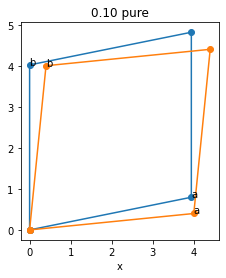

pure unit cell [ 4.019950  4.019950  4.000000 90.000000 90.000000 78.578814]
dzero unit cell [ 4.019900  4.019900  4.000000 90.000000 90.000000 78.579000]
UBI:
[[4.000000 0.400000 0.000000]
 [0.400000 4.000000 0.000000]
 [0.000000 0.000000 4.000000]]
UBI0:
[[3.940301 0.796007 0.000000]
 [0.000000 4.019900 0.000000]
 [0.000000 0.000000 4.000000]]
Grain co-ordinates micro eps, m= 0
[[ 5.9  0.8 -0.0]
 [ 0.8  6.2 -0.0]
 [-0.0 -0.0  0.0]]
Sample co-ordinates micro eps, m= 0
[[ 6.1  0.8 -0.0]
 [ 0.8  6.1 -0.0]
 [-0.0 -0.0  0.0]]
Grain co-ordinates micro eps, m= 0.5
[[11.8  1.6 -0.0]
 [ 1.6 12.5 -0.0]
 [-0.0 -0.0  0.0]]
Sample co-ordinates micro eps, m= 0.5
[[12.2  1.7 -0.0]
 [ 1.7 12.2 -0.0]
 [-0.0 -0.0  0.0]]
Grain co-ordinates micro eps, m= 1
[[11.8  1.6 -0.0]
 [ 1.6 12.5 -0.0]
 [-0.0 -0.0  0.0]]
Sample co-ordinates micro eps, m= 1
[[12.2  1.7 -0.0]
 [ 1.7 12.2 -0.0]
 [-0.0 -0.0  0.0]]


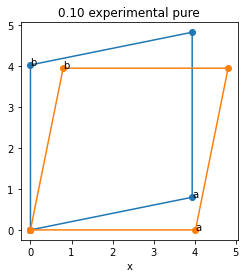

experimental pure unit cell [ 4.019950  4.019950  4.000000 90.000000 90.000000 78.578814]
dzero unit cell [ 4.019900  4.019900  4.000000 90.000000 90.000000 78.579000]
UBI:
[[4.019950 0.000000 0.000000]
 [0.796030 3.940347 0.000000]
 [0.000000 0.000000 4.000000]]
UBI0:
[[3.940301 0.796007 0.000000]
 [0.000000 4.019900 0.000000]
 [0.000000 0.000000 4.000000]]
Grain co-ordinates micro eps, m= 0
[[ 5.9  0.8 -0.0]
 [ 0.8  6.2 -0.0]
 [-0.0 -0.0  0.0]]
Sample co-ordinates micro eps, m= 0
[[ 6.2  0.8 -0.0]
 [ 0.8  5.9 -0.0]
 [-0.0 -0.0  0.0]]
Grain co-ordinates micro eps, m= 0.5
[[11.8  1.6 -0.0]
 [ 1.6 12.5 -0.0]
 [-0.0 -0.0  0.0]]
Sample co-ordinates micro eps, m= 0.5
[[12.5  1.6 -0.0]
 [ 1.6 11.8 -0.0]
 [-0.0 -0.0  0.0]]
Grain co-ordinates micro eps, m= 1
[[11.8  1.6 -0.0]
 [ 1.6 12.5 -0.0]
 [-0.0 -0.0  0.0]]
Sample co-ordinates micro eps, m= 1
[[12.5  1.6 -0.0]
 [ 1.6 11.8  0.0]
 [-0.0  0.0  0.0]]


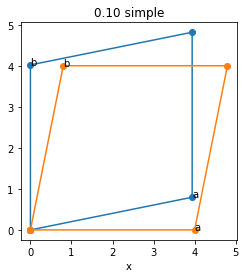

simple unit cell [ 4.000000  4.079216  4.000000 90.000000 90.000000 78.690068]
dzero unit cell [ 4.019900  4.019900  4.000000 90.000000 90.000000 78.579000]
UBI:
[[4.000000 0.000000 0.000000]
 [0.800000 4.000000 0.000000]
 [0.000000 0.000000 4.000000]]
UBI0:
[[3.940301 0.796007 0.000000]
 [0.000000 4.019900 0.000000]
 [0.000000 0.000000 4.000000]]
Grain co-ordinates micro eps, m= 0
[[-2282.2 -1484.2    -0.0]
 [-1484.2  7319.5     0.0]
 [   -0.0     0.0     0.0]]
Sample co-ordinates micro eps, m= 0
[[-2480.8   505.8     0.0]
 [  505.8  7518.2     0.0]
 [    0.0     0.0     0.0]]
Grain co-ordinates micro eps, m= 0.5
[[-4549.5 -2983.5    -0.0]
 [-2983.5 14751.1     0.0]
 [   -0.0     0.0     0.0]]
Sample co-ordinates micro eps, m= 0.5
[[-4948.9  1016.8     0.0]
 [ 1016.8 15150.5     0.0]
 [    0.0     0.0     0.0]]
Grain co-ordinates micro eps, m= 1
[[-4534.7 -2998.7    -0.0]
 [-2998.7 14864.4    -0.0]
 [   -0.0    -0.0     0.0]]
Sample co-ordinates micro eps, m= 1
[[-4936.1  1022.0    -0

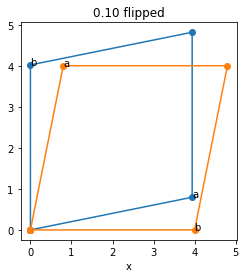

flipped unit cell [ 4.079216  4.000000  4.000000 90.000000 90.000000 78.690068]
dzero unit cell [ 4.019900  4.019900  4.000000 90.000000 90.000000 78.579000]
UBI:
[[ 0.800000  4.000000  0.000000]
 [ 4.000000  0.000000  0.000000]
 [-0.000000 -0.000000 -4.000000]]
UBI0:
[[3.940301 0.796007 0.000000]
 [0.000000 4.019900 0.000000]
 [0.000000 0.000000 4.000000]]
Grain co-ordinates micro eps, m= 0
[[ 7519.2   495.8    -0.0]
 [  495.8 -2481.8     0.0]
 [   -0.0     0.0    -0.0]]
Sample co-ordinates micro eps, m= 0
[[-2480.8   505.8    -0.0]
 [  505.8  7518.2     0.0]
 [   -0.0     0.0    -0.0]]
Grain co-ordinates micro eps, m= 0.5
[[15152.5   996.7    -0.0]
 [  996.7 -4950.9     0.0]
 [   -0.0     0.0     0.0]]
Sample co-ordinates micro eps, m= 0.5
[[-4948.9  1016.8    -0.0]
 [ 1016.8 15150.5     0.0]
 [   -0.0     0.0     0.0]]
Grain co-ordinates micro eps, m= 1
[[15267.8  1001.7    -0.0]
 [ 1001.7 -4938.1    -0.0]
 [   -0.0    -0.0     0.0]]
Sample co-ordinates micro eps, m= 1
[[-4936.1  10

In [8]:
a0 = 4.
f = 0.1
reference_cell = [a0+0.0199,a0+0.0199,a0,90,90,78.579]

def flipped(a0,f):
    a, b, c = np.array( simple_shear_lattice( a0, f ) )
    return (b, a, -c )
    
lattices = {
    "pure" : pure_shear_lattice,
    "experimental pure" : experimental_shear_lattice,
    "simple" : simple_shear_lattice,
    "flipped" : flipped
}    

for name in lattices:
    print("============================================================")
    plotstrain(lattices[name], a0, f, name, reference_cell)